In [420]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import libraries to data exploration
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py 
import plotly.graph_objs as go
import scipy.cluster.hierarchy as shc
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.preprocessing import StandardScaler
import os
import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [421]:
# Load the customers dataset
df=pd.read_csv("/Users/elianezanlorense/Documents/Data Mining/Project Material-20191204/A2Z Insurance.csv",sep=",")

In [422]:
# Display the 10th rows of the dataset
display(df.head())

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [423]:
# Display the type of features
df.dtypes

Customer Identity                        int64
First Policy´s Year                    float64
Brithday Year                          float64
Educational Degree                      object
Gross Monthly Salary                   float64
Geographic Living Area                 float64
Has Children (Y=1)                     float64
Customer Monetary Value                float64
Claims Rate                            float64
Premiums in LOB: Motor                 float64
Premiums in LOB: Household             float64
Premiums in LOB: Health                float64
Premiums in LOB:  Life                 float64
Premiums in LOB: Work Compensations    float64
dtype: object

In [424]:
#see missing in the variables
df.isnull().sum()

Customer Identity                        0
First Policy´s Year                     30
Brithday Year                           17
Educational Degree                      17
Gross Monthly Salary                    36
Geographic Living Area                   1
Has Children (Y=1)                      21
Customer Monetary Value                  0
Claims Rate                              0
Premiums in LOB: Motor                  34
Premiums in LOB: Household               0
Premiums in LOB: Health                 43
Premiums in LOB:  Life                 104
Premiums in LOB: Work Compensations     86
dtype: int64

In [425]:
#Display the shape of dataset #features and #obs
df.shape

(10296, 14)

In [426]:
# Check duplicated Customer Identify
df['Customer Identity'].duplicated().sum()

0

In [427]:
#Checking the data integrity
df=df[df['Brithday Year']<df['First Policy´s Year']]
df.shape

(8092, 14)

In [428]:
df['Has Children (Y=1)']=df['Has Children (Y=1)'].replace(1.,'1')
df['Has Children (Y=1)']=df['Has Children (Y=1)'].replace(0.,'0')
df['Has Children (Y=1)']=df['Has Children (Y=1)'].replace(np.nan,'Sem Informacao')
df['Has Children (Y=1)'].unique()
df['Geographic Living Area']=df['Geographic Living Area'].replace(np.nan,'Not Information')
df['Geographic Living Area']=df['Geographic Living Area'].replace(1.0,'1')
df['Geographic Living Area']=df['Geographic Living Area'].replace(2.0,'2')
df['Geographic Living Area']=df['Geographic Living Area'].replace(3.0,'3')
df['Geographic Living Area']=df['Geographic Living Area'].replace(4.0,'4')
df['Educational Degree']=df['Educational Degree'].replace(np.nan,'Not Information')
df['Educational Degree'].unique()
df['Geographic Living Area'].unique()

array(['1', '3', '4', '2'], dtype=object)

In [429]:
df['Premiums in LOB: Work Compensations']=df['Premiums in LOB: Work Compensations'].fillna(df['Premiums in LOB: Work Compensations'].mean())
df['Premiums in LOB:  Life']=df['Premiums in LOB:  Life'].fillna(df['Premiums in LOB:  Life'].mean())
df['Premiums in LOB: Health']=df['Premiums in LOB: Health'].fillna(df['Premiums in LOB: Health'].mean())
df['Premiums in LOB: Household']=df['Premiums in LOB: Household'].fillna(df['Premiums in LOB: Household'].mean())
df['Premiums in LOB: Motor']=df['Premiums in LOB: Motor'].fillna(df['Premiums in LOB: Motor'].mean())
df['Claims Rate']=df['Claims Rate'].fillna(df['Claims Rate'].mean())
df['Customer Monetary Value']=df['Customer Monetary Value'].fillna(df['Customer Monetary Value'].mean())
df['Gross Monthly Salary']=df['Gross Monthly Salary'].fillna(df['Gross Monthly Salary'].mean())

In [430]:
#The current year of the database is 2016
df['current year']=2016
df['Age']=df['current year']-df['Brithday Year'] 
df['Age Policy']=df['First Policy´s Year']-df['Brithday Year'] 
df['Policy year']=df['current year']-df['First Policy´s Year'] 
df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,current year,Age,Age Policy,Policy year
0,1,1985.0,1982.0,2 - High School,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,2016,34.0,3.0,31.0
2,3,1991.0,1970.0,1 - Basic,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,2016,46.0,21.0,25.0
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,2016,35.0,9.0,26.0
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,2016,43.0,13.0,30.0
5,6,1986.0,1956.0,2 - High School,2566.0,4,1,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,2016,60.0,30.0,30.0


In [431]:
df.dtypes
df_without=df.copy()
df_without.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,current year,Age,Age Policy,Policy year
0,1,1985.0,1982.0,2 - High School,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,2016,34.0,3.0,31.0
2,3,1991.0,1970.0,1 - Basic,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,2016,46.0,21.0,25.0
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,2016,35.0,9.0,26.0
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,2016,43.0,13.0,30.0
5,6,1986.0,1956.0,2 - High School,2566.0,4,1,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,2016,60.0,30.0,30.0


In [432]:
#Outliers
def drop_outliers(df, field_name):
    distance = 1.5 * (np.nanpercentile(df[field_name], 75) - np.nanpercentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.nanpercentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.nanpercentile(df[field_name], 25) - distance].index, inplace=True)

if __name__ == "__main__":
  # assuming df exists and contains numeric variables

  print(df.shape)

for column in df.select_dtypes(include=[np.number]).columns:
      drop_outliers(df, column)

print(df.shape)

(8092, 18)
(6875, 18)


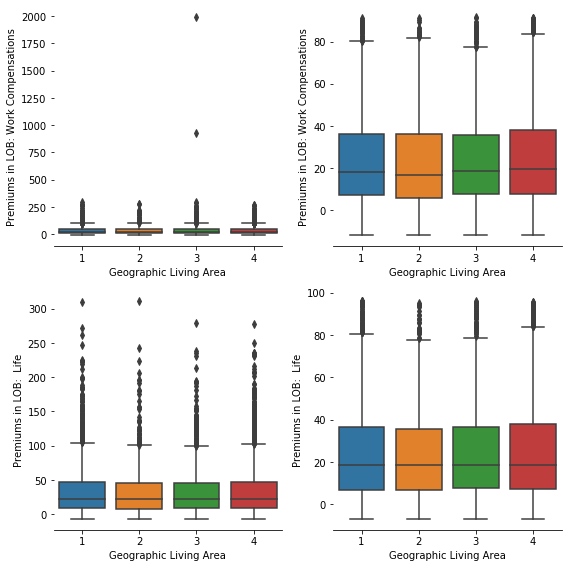

In [433]:
f,axes = plt.subplots(2, 2, figsize=(8, 8))
sns.despine(left=True)
sns.boxplot(y='Premiums in LOB: Work Compensations', x='Geographic Living Area',
                 data=df_without, ax=axes[0, 0])
sns.boxplot(y='Premiums in LOB: Work Compensations', x='Geographic Living Area',
                 data=df, ax=axes[0, 1])
sns.boxplot(y='Premiums in LOB:  Life', x='Geographic Living Area',
                 data=df_without, ax=axes[1, 0])
sns.boxplot(y='Premiums in LOB:  Life', x='Geographic Living Area',
                 data=df, ax=axes[1, 1])
plt.savefig('medals.svg')
#sns.boxplot(y='Premiums in LOB: Health', x='Geographic Living Area',
                 #data=df, ax=axes[0, 2])
#sns.boxplot(y='Premiums in LOB: Household', x='Geographic Living Area',
                 #data=df, ax=axes[1, 0])
#sns.boxplot(y='Claims Rate', x='Geographic Living Area',
                 #data=df, ax=axes[1, 1])
#sns.boxplot(y='Customer Monetary Value', x='Geographic Living Area',
                 #data=df, ax=axes[1, 2])
plt.tight_layout()

In [434]:

#Outliers
def drop_outliers(df, field_name):
    distance = 1.5 * (np.nanpercentile(df[field_name], 75) - np.nanpercentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.nanpercentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.nanpercentile(df[field_name], 25) - distance].index, inplace=True)

if __name__ == "__main__":
  # assuming df exists and contains numeric variables

  print(df.shape)

for column in df.select_dtypes(include=[np.number]).columns:
      drop_outliers(df, column)

print(df.shape)

(6875, 18)
(6355, 18)


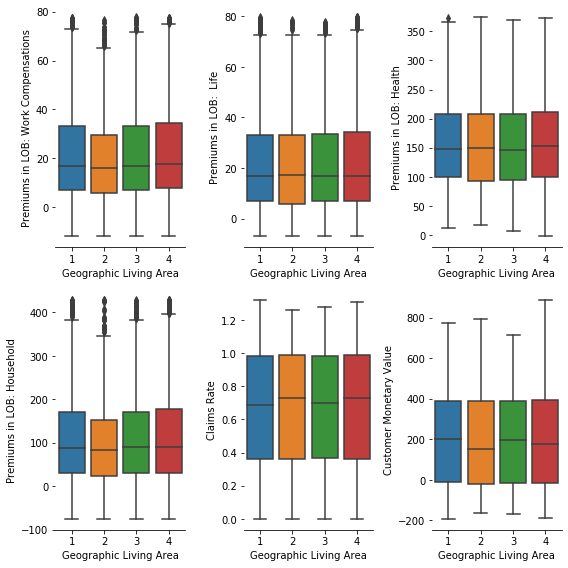

In [435]:
f,axes = plt.subplots(2, 3, figsize=(8, 8))
sns.despine(left=True)
sns.boxplot(y='Premiums in LOB: Work Compensations', x='Geographic Living Area',
                 data=df, ax=axes[0, 0])
sns.boxplot(y='Premiums in LOB:  Life', x='Geographic Living Area',
                 data=df, ax=axes[0, 1])
sns.boxplot(y='Premiums in LOB: Health', x='Geographic Living Area',
                 data=df, ax=axes[0, 2])
sns.boxplot(y='Premiums in LOB: Household', x='Geographic Living Area',
                 data=df, ax=axes[1, 0])
sns.boxplot(y='Claims Rate', x='Geographic Living Area',
                 data=df, ax=axes[1, 1])
sns.boxplot(y='Customer Monetary Value', x='Geographic Living Area',
                 data=df, ax=axes[1, 2])
plt.tight_layout()

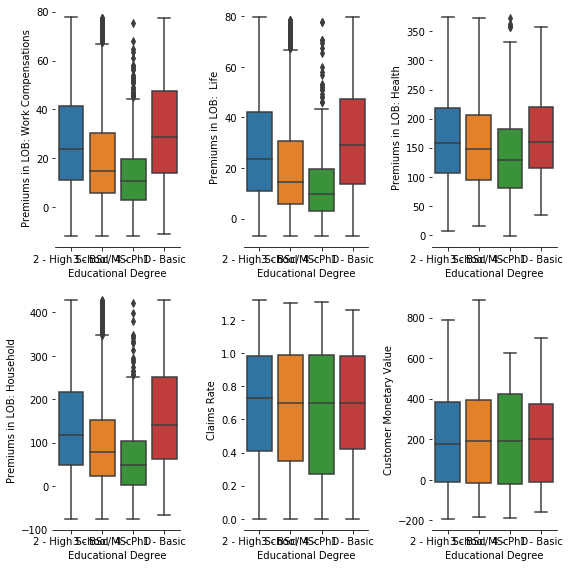

In [436]:
f,axes = plt.subplots(2, 3, figsize=(8, 8))
sns.despine(left=True)
sns.boxplot(y='Premiums in LOB: Work Compensations', x='Educational Degree',
                 data=df, ax=axes[0, 0])
sns.boxplot(y='Premiums in LOB:  Life', x='Educational Degree',
                 data=df, ax=axes[0, 1])
sns.boxplot(y='Premiums in LOB: Health', x='Educational Degree',
                 data=df, ax=axes[0, 2])
sns.boxplot(y='Premiums in LOB: Household', x='Educational Degree',
                 data=df, ax=axes[1, 0])
sns.boxplot(y='Claims Rate', x='Educational Degree',
                 data=df, ax=axes[1, 1])
sns.boxplot(y='Customer Monetary Value', x='Educational Degree',
                 data=df, ax=axes[1, 2])
plt.tight_layout()

In [437]:
keep=['Premiums in LOB: Work Compensations','Premiums in LOB:  Life','Premiums in LOB: Health',
      'Premiums in LOB: Household','Premiums in LOB: Motor','Claims Rate','Customer Monetary Value',
      'Gross Monthly Salary','Age','Age Policy','Policy year'
     ]
X_cor=df[keep]

In [438]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_cor)
len(X_cor.columns[constant_filter.get_support()])
constant_columns = [column for column in X_cor.columns
                    if column not in X_cor.columns[constant_filter.get_support()]]

print(len(constant_columns))
for column in constant_columns:
    print(column)
#Neste caso todas as variaveis permanecem

0


In [439]:
correlated_features = set()
correlation_matrix =X_cor.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)
print(correlated_features)



{'Age Policy', 'Age', 'Premiums in LOB: Motor', 'Customer Monetary Value'}


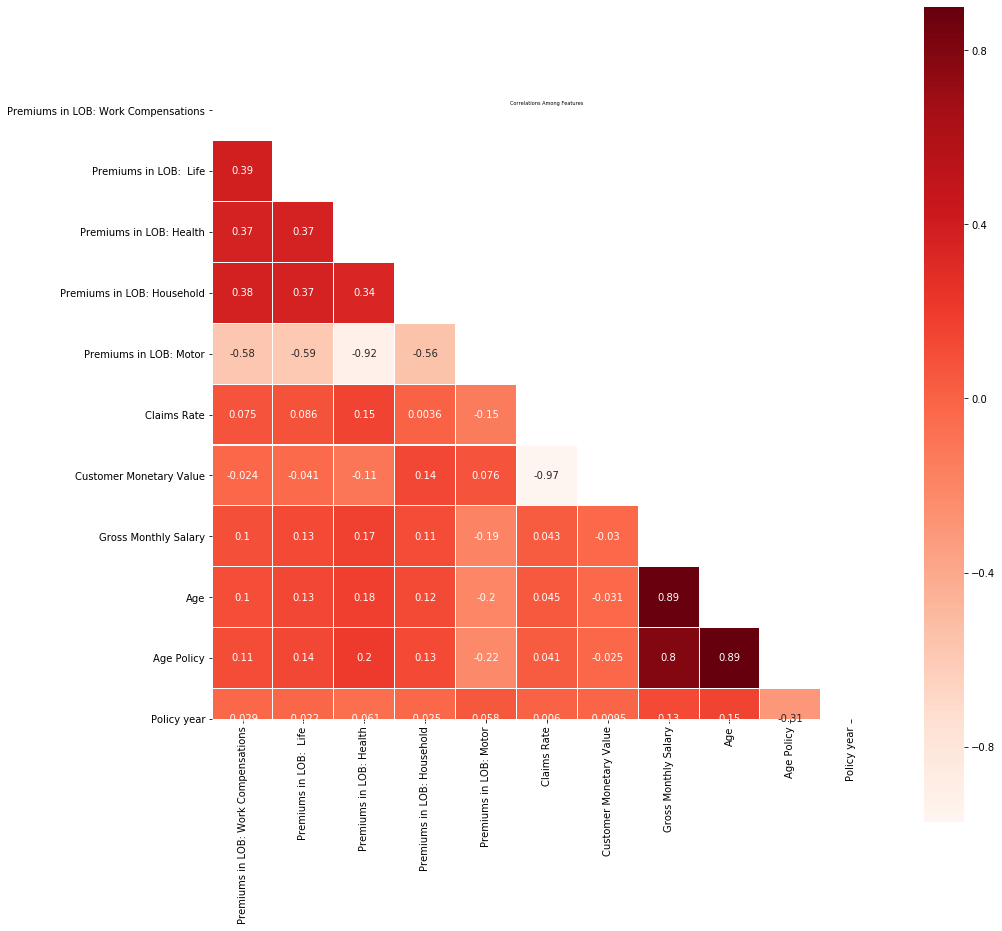

<Figure size 432x288 with 0 Axes>

In [440]:
mask = np.zeros_like(X_cor.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,15))
sns.heatmap(X_cor.corr(), 
            annot=True,
            mask = mask,
            cmap = plt.cm.Reds,
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 5)
plt.show()
plt.savefig('medals.svg')

In [441]:
import pickle as pk
df_end=df.drop(['Age Policy', 'Premiums in LOB: Motor', 'Age', 'Customer Monetary Value'],axis=1)

In [442]:
df_end.describe()

,Customer Identity,First Policy´s Year,Brithday Year,Gross Monthly Salary,Claims Rate,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,current year,Policy year
count,6355.000000,6355.000000,6355.000000,6355.000000,6355.000000,6355.000000,6355.000000,6355.000000,6355.000000,6355.0,6355.000000
mean,5097.600315,1986.690323,1962.386939,2796.763314,0.668116,109.745264,156.875038,21.942998,21.681718,2016.0,29.309677
std,2968.760546,6.461364,13.669381,806.618422,0.327439,109.531621,75.102334,19.784790,20.039484,0.0,6.461364
min,1.000000,1974.000000,1935.000000,436.000000,0.000000,-75.000000,-2.110000,-7.000000,-12.000000,2016.0,18.000000
25%,2532.500000,1981.000000,1951.000000,2202.000000,0.360000,29.450000,98.020000,6.780000,6.780000,2016.0,24.000000
50%,5081.000000,1987.000000,1963.000000,2793.000000,0.710000,88.900000,150.140000,16.780000,17.450000,2016.0,29.000000
75%,7641.500000,1992.000000,1973.000000,3407.500000,0.980000,171.700000,209.930000,33.450000,33.340000,2016.0,35.000000
max,10296.000000,1998.000000,1995.000000,5021.000000,1.320000,428.400000,373.960000,79.570000,77.680000,2016.0,42.000000


In [443]:
df_end.to_pickle('df_end.pkl')

In [444]:
df_dsenv=pd.read_pickle('df_end.pkl')

In [445]:
df_dsenv.groupby(['Geographic Living Area'])['Gross Monthly Salary','Premiums in LOB: Household',
    'Premiums in LOB: Health','Premiums in LOB: Work Compensations','Claims Rate',
                                         'Premiums in LOB:  Life'].mean()

,Gross Monthly Salary,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Work Compensations,Claims Rate,Premiums in LOB: Life
Geographic Living Area,,,,,,
1,2798.106398,107.937540,156.017280,21.538965,0.662492,21.621895
2,2835.370258,104.438199,154.256133,20.345212,0.674643,21.826305
3,2752.817050,110.480626,154.907519,21.565406,0.667084,22.067825
4,2808.256906,112.014548,159.145264,22.179287,0.671065,22.141546


In [446]:
df_dsenv.groupby(['Educational Degree'])['Gross Monthly Salary','Premiums in LOB: Household',
    'Premiums in LOB: Health','Premiums in LOB: Work Compensations','Claims Rate',
                                         'Premiums in LOB:  Life'].mean()

,Gross Monthly Salary,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Work Compensations,Claims Rate,Premiums in LOB: Life
Educational Degree,,,,,,
1 - Basic,2668.074074,159.190278,168.220664,31.927838,0.690494,31.925021
2 - High School,2762.939930,136.728069,165.903655,27.131752,0.686541,27.736445
3 - BSc/MSc,2822.739606,99.255101,154.554580,19.429376,0.661346,19.471257
4 - PhD,2813.522918,62.349828,136.509565,12.795430,0.639656,13.486414


In [447]:
keep=['Premiums in LOB: Work Compensations','Premiums in LOB:  Life','Premiums in LOB: Health',
      'Premiums in LOB: Household']
X = StandardScaler().fit_transform(df_dsenv[keep])

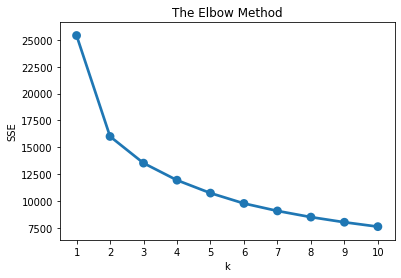

<Figure size 432x288 with 0 Axes>

In [448]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

plt.savefig('plot.png')
#Ideally, we want to choose the point on the elbow chart where the
#SSE stops decreasing at an increasing rate — i.e. the point where the change gradient of between the number 
#of clusters becomes constant. For our model we will choose k=2-3.

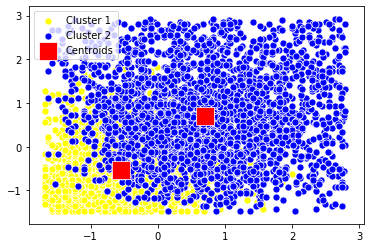

In [449]:
kmeans_2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_2 = kmeans_2.fit_predict(X)
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_3 = kmeans_3.fit_predict(X)

# Visualising the clusters
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

sns.scatterplot(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], color = 'red', 
               label = 'Centroids',s=300,marker=',')

#We need do a subplot 
#sns.scatterplot(X[y_kmeans_3 == 0, 0], X[y_kmeans_3 == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
#sns.scatterplot(X[y_kmeans_3 == 1, 0], X[y_kmeans_3 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
#sns.scatterplot(X[y_kmeans_3 == 3, 0], X[y_kmeans_3 == 3, 1], color = 'green', label = 'Cluster 3',s=50)
#sns.scatterplot(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], color = 'red', 
              # label = 'Centroids',s=300,marker=',')

In [450]:
df_dsenv['Cluster_Id'] = kmeans_2.labels_
centers_2 = kmeans_2.cluster_centers_
centers_2

array([[-0.540397  , -0.53885924, -0.51959383, -0.52431835],
       [ 0.70977517,  0.70775542,  0.6824516 ,  0.68865693]])

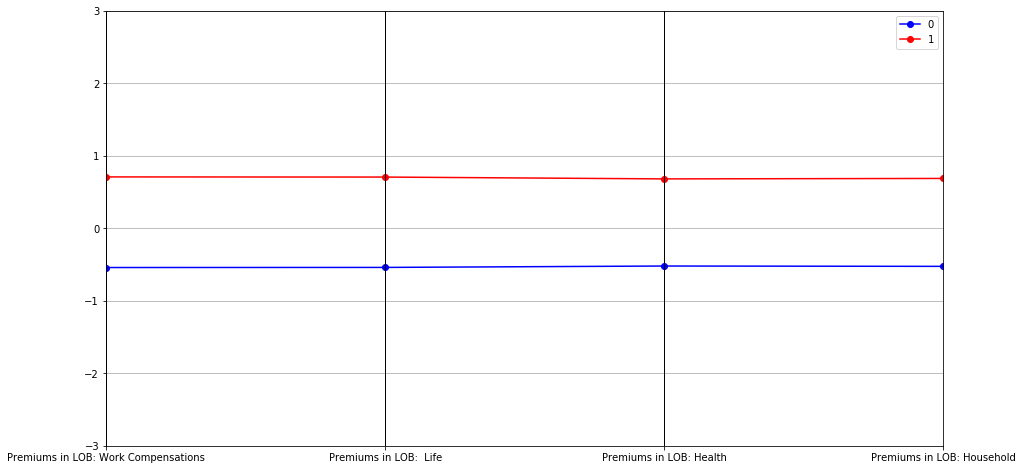

In [451]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

P = pd_centers(keep, centers_2)

# Function that creates Parallel Plots
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')
    
parallel_plot(P)

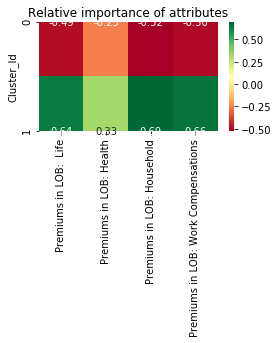

In [452]:

cluster_avg=df_dsenv.groupby(['Cluster_Id'])['Premiums in LOB: Household',
    'Premiums in LOB: Health','Premiums in LOB: Work Compensations',
                                         'Premiums in LOB:  Life'].mean()
pop_avg=df_dsenv[keep].mean()

relative_imp = cluster_avg / pop_avg - 1

# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(4, 2))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




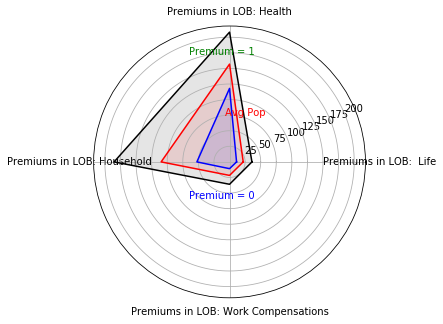

In [453]:
cluster_avg=pd.DataFrame(df_dsenv.groupby(['Cluster_Id'])['Premiums in LOB: Household',
    'Premiums in LOB: Health','Premiums in LOB: Work Compensations',
                                         'Premiums in LOB:  Life'].mean())

cluster_avg
total_avg = pd.DataFrame(df_dsenv[keep].mean(), columns=['Pop Avg']).T
total_avg
cluster_mean =total_avg.append([cluster_avg])
cluster_mean
values = cluster_mean.iloc[0].tolist() #
values += values [:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

values2 = cluster_mean.iloc[1].tolist() # 
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

values3 = cluster_mean.iloc[2].tolist() # 
values3 += values3 [:1]

angles3 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles3 += angles3 [:1]

plt.figure(figsize=(5,5))
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)
# Group1
ax.plot(angles, values, color = 'r')
ax.fill(angles, values, 'red', alpha=0.1)

# Group2
ax.plot(angles2, values2, color = 'b')
ax.fill(angles2, values2, 'blue', alpha=0.1)


# Total Average
ax.plot(angles3, values3, color = 'black')
ax.fill(angles3, values3, 'black', alpha=0.1)

plt.figtext(0.5,0.63,"Avg Pop",color="red")
plt.figtext(0.4,0.4,"Premium = 0",color="blue")
plt.figtext(0.4,0.8,"Premium = 1",color="green")
plt.show()

In [454]:
df_dsenv.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Claims Rate,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,current year,Policy year,Cluster_Id
0,1,1985.0,1982.0,2 - High School,2177.0,1,1,0.39,79.45,146.36,47.01,16.89,2016,31.0,1
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4,1,0.99,43.35,311.17,35.34,28.34,2016,26.0,1
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4,1,0.90,47.80,182.59,18.78,41.45,2016,30.0,1
5,6,1986.0,1956.0,2 - High School,2566.0,4,1,1.00,18.90,114.80,7.00,7.67,2016,30.0,0
6,7,1979.0,1943.0,2 - High School,4103.0,4,0,1.05,295.60,317.95,14.67,26.34,2016,37.0,1


In [455]:
df_dsenv.groupby(['Geographic Living Area','Educational Degree','Cluster_Id'])['Cluster_Id'].count()

Geographic Living Area  Educational Degree  Cluster_Id
1                       1 - Basic           0              39
                                            1              62
                        2 - High School     0             256
                                            1             262
                        3 - BSc/MSc         0             645
                                            1             418
                        4 - PhD             0             137
                                            1              35
2                       1 - Basic           0              15
                                            1              20
                        2 - High School     0              77
                                            1              99
                        3 - BSc/MSc         0             243
                                            1             130
                        4 - PhD             0              49
               

In [456]:
keep=['Gross Monthly Salary','Claims Rate','Cluster_Id']
dummies=['Educational Degree','Geographic Living Area','Has Children (Y=1)']
dummies=pd.get_dummies(df_dsenv[dummies], drop_first=True)
dummies.shape
dummies.head()
df_dsenv=pd.concat([df_dsenv[keep], dummies],axis=1)

In [457]:
df_dsenv.head()

,Gross Monthly Salary,Claims Rate,Cluster_Id,Educational Degree_2 - High School,Educational Degree_3 - BSc/MSc,Educational Degree_4 - PhD,Geographic Living Area_2,Geographic Living Area_3,Geographic Living Area_4,Has Children (Y=1)_1,Has Children (Y=1)_Sem Informacao
0,2177.0,0.39,1,1,0,0,0,0,0,1,0
3,1099.0,0.99,1,0,1,0,0,0,1,1,0
4,1763.0,0.90,1,0,1,0,0,0,1,1,0
5,2566.0,1.00,0,1,0,0,0,0,1,1,0
6,4103.0,1.05,1,1,0,0,0,0,1,0,0


In [458]:

y=df_dsenv['Cluster_Id']
y.head()
y.shape
X=df_dsenv.drop(['Cluster_Id'],axis=1)
X.head()

,Gross Monthly Salary,Claims Rate,Educational Degree_2 - High School,Educational Degree_3 - BSc/MSc,Educational Degree_4 - PhD,Geographic Living Area_2,Geographic Living Area_3,Geographic Living Area_4,Has Children (Y=1)_1,Has Children (Y=1)_Sem Informacao
0,2177.0,0.39,1,0,0,0,0,0,1,0
3,1099.0,0.99,0,1,0,0,0,1,1,0
4,1763.0,0.90,0,1,0,0,0,1,1,0
5,2566.0,1.00,1,0,0,0,0,1,1,0
6,4103.0,1.05,1,0,0,0,0,1,0,0


In [539]:
#Divindo a amostra em validacao e treino, neste caso usou-se a proporcao 70/30

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [540]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_pred = clf.predict( X_test)

In [541]:
pred_scores = clf.predict_proba(X_test)[:,1]
X_test['pred']=pred_scores
X_test.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gross Monthly Salary,Claims Rate,Educational Degree_2 - High School,Educational Degree_3 - BSc/MSc,Educational Degree_4 - PhD,Geographic Living Area_2,Geographic Living Area_3,Geographic Living Area_4,Has Children (Y=1)_1,Has Children (Y=1)_Sem Informacao,pred
9094,3431.0,0.95,1,0,0,0,0,1,0,0,0.597464
5281,2714.0,1.00,1,0,0,0,0,0,1,0,0.280097
4289,3494.0,0.30,1,0,0,0,1,0,0,0,0.363248
10063,1447.0,0.98,1,0,0,0,0,1,1,0,0.280097
1588,1528.0,0.46,0,1,0,0,0,1,1,0,0.574503


In [532]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances 

,feature,importance
1,Claims Rate,0.858
8,Has Children (Y=1)_1,0.133
0,Gross Monthly Salary,0.008
2,Educational Degree_2 - High School,0.000
3,Educational Degree_3 - BSc/MSc,0.000
4,Educational Degree_4 - PhD,0.000
5,Geographic Living Area_2,0.000
6,Geographic Living Area_3,0.000
7,Geographic Living Area_4,0.000
9,Has Children (Y=1)_Sem Informacao,0.000


In [575]:
keep_2=['Claims Rate','Gross Monthly Salary','Has Children (Y=1)_1','pred']
df_vali=pd.concat([X_test[keep_2],y_test],axis=1)
df_vali

,Claims Rate,Gross Monthly Salary,Has Children (Y=1)_1,pred,Cluster_Id
9094,0.95,3431.0,0,0.597464,1
5281,1.00,2714.0,1,0.280097,0
4289,0.30,3494.0,0,0.363248,1
10063,0.98,1447.0,1,0.280097,0
1588,0.46,1528.0,1,0.574503,1
...,...,...,...,...,...
6333,0.58,3065.0,0,0.896970,1
4347,0.87,1743.0,1,0.280097,1
6132,0.93,3378.0,0,0.597464,1
1252,0.87,3154.0,1,0.280097,0


In [580]:
df_vali.isnull().sum()

Claims Rate             0
Gross Monthly Salary    0
Has Children (Y=1)_1    0
pred                    0
Cluster_Id              0
dtype: int64

In [610]:
np.percentile(df_vali['pred'], [10,25,55,80,90], axis=0)

array([0.16286645, 0.28009679, 0.36324786, 0.59746434, 0.8969697 ])

In [582]:
df_vali.groupby(['Has Children (Y=1)_1'])['pred'].mean()

Has Children (Y=1)_1
0    0.607766
1    0.357653
Name: pred, dtype: float64

In [585]:
df_vali['pred'].describe()

count    1271.000000
mean        0.430070
std         0.258257
min         0.063380
25%         0.280097
50%         0.280097
75%         0.597464
max         0.896970
Name: pred, dtype: float64

In [613]:
def f(row):
    if row['pred'] <.17:
        val = 0
    elif row['pred'] >= .17 and row['pred'] <.28:
        val = 1
    elif row['pred'] >= .28 and row['pred'] <.36:
        val = 2
    elif row['pred'] >= .36 and row['pred'] <.59:
        val = 3
    elif row['pred'] >= .59 and row['pred'] <.89:
        val = 4
    else:
        val = 5
    return val
df_vali['as'] = df_vali.apply(f, axis=1)
df_vali.head()

,Claims Rate,Gross Monthly Salary,Has Children (Y=1)_1,pred,Cluster_Id,as
9094,0.95,3431.0,0,0.597464,1,4
5281,1.00,2714.0,1,0.280097,0,2
4289,0.30,3494.0,0,0.363248,1,3
10063,0.98,1447.0,1,0.280097,0,2
1588,0.46,1528.0,1,0.574503,1,3


In [617]:
df_vali.groupby(['as'])['Cluster_Id'].count()
#df_vali.groupby(['Has Children (Y=1)_1','as'])['Claims Rate'].mean()
df_vali.groupby(['as'])['Claims Rate'].mean()
#df_vali.groupby(['as'])['Gross Monthly Salary'].mean()
#df_vali.groupby(['Has Children (Y=1)_1','as']).count()
#df_vali.groupby(['Has Children (Y=1)_1','as'])["Gross Monthly Salary"].mean()

as
0    0.159302
1    0.307692
2    0.980553
3    0.428249
4    0.974286
5    0.666281
Name: Claims Rate, dtype: float64

In [401]:
y_new=df_dsenv['Cluster_Id']
y_new.head()
y_new.shape
X_new=df_dsenv.drop(['Cluster_Id',"Claims Rate"],axis=1)
X_new.head()
keep_1=['Age']
X_new=pd.concat([X_new,df[keep_1]],axis=1)

In [402]:
X_new.head()

,Gross Monthly Salary,Educational Degree_2 - High School,Educational Degree_3 - BSc/MSc,Educational Degree_4 - PhD,Geographic Living Area_2,Geographic Living Area_3,Geographic Living Area_4,Has Children (Y=1)_1,Has Children (Y=1)_Sem Informacao,Age
0,2177.0,1,0,0,0,0,0,1,0,34.0
3,1099.0,0,1,0,0,0,1,1,0,35.0
4,1763.0,0,1,0,0,0,1,1,0,43.0
5,2566.0,1,0,0,0,0,1,1,0,60.0
6,4103.0,1,0,0,0,0,1,0,0,73.0


In [404]:
import numpy
from sklearn import linear_model
cls = RandomForestRegressor()#c

from sklearn.model_selection import train_test_split
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y_new, test_size=0.2, random_state=123)
cls.fit(X_train_n, y_train_n)
scoreOfModel = cls.score(X_train_n, y_train_n)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

